# “Exploratory data analysis can never be the whole story, but nothing else can serve as the foundation stone. —John Tukey"

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [4]:
sns.get_dataset_names()

['anscombe',
 'attention',
 'brain_networks',
 'car_crashes',
 'diamonds',
 'dots',
 'exercise',
 'flights',
 'fmri',
 'gammas',
 'iris',
 'mpg',
 'planets',
 'tips',
 'titanic']

In [5]:
iris= sns.load_dataset('iris')

In [6]:
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [7]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
sepal_length    150 non-null float64
sepal_width     150 non-null float64
petal_length    150 non-null float64
petal_width     150 non-null float64
species         150 non-null object
dtypes: float64(4), object(1)
memory usage: 5.3+ KB


In [8]:
iris['species']= iris.species.astype('category')

In [9]:
iris.info() # look at size after change data type. it should be reduce

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
sepal_length    150 non-null float64
sepal_width     150 non-null float64
petal_length    150 non-null float64
petal_width     150 non-null float64
species         150 non-null category
dtypes: category(1), float64(4)
memory usage: 4.9 KB


In [10]:
sns.set() # set style for intractive feel

In [11]:
iris['species'].unique()

[setosa, versicolor, virginica]
Categories (3, object): [setosa, versicolor, virginica]

In [12]:
versicolor = iris[iris.species=='versicolor']

In [13]:
versicolor.head()

,sepal_length,sepal_width,petal_length,petal_width,species
50,7.0,3.2,4.7,1.4,versicolor
51,6.4,3.2,4.5,1.5,versicolor
52,6.9,3.1,4.9,1.5,versicolor
53,5.5,2.3,4.0,1.3,versicolor
54,6.5,2.8,4.6,1.5,versicolor


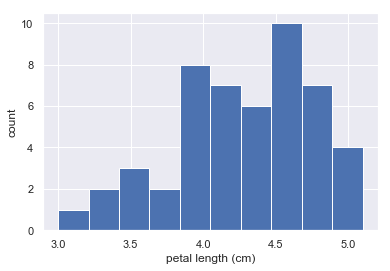

In [18]:
plt.hist(versicolor['petal_length'])
plt.xlabel('petal length (cm)')
plt.ylabel('count')
plt.show()

In [22]:
# use 'squre root rule' to calculate bin
n_bins= np.sqrt(len(versicolor))

In [23]:
n_bins

7.0710678118654755

In [24]:
n_bins= int(n_bins)
n_bins

7

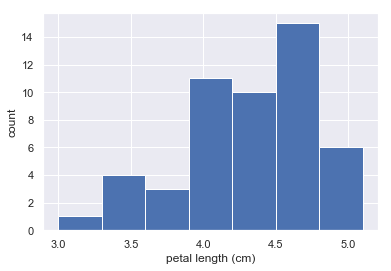

In [25]:
plt.hist(versicolor.petal_length, bins=n_bins)
plt.xlabel('petal length (cm)')
plt.ylabel('count')
plt.show()

In [27]:
iris.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')

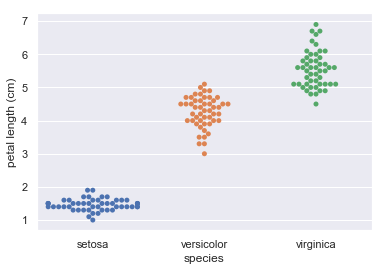

In [28]:
# plot swarm plot for all three species will give more insight
_= sns.swarmplot(x='species', y='petal_length', data=iris) #_ variable with no name in memory
_= plt.xlabel('species')
_= plt.ylabel('petal length (cm)')
plt.show()

#### Conclusion from above graph is that virginca petal length is high and setosa is low out of three species

## ECDF
Emperical comulative distributive function. ECDF graph tell us how much % of data lies under the value on x axis

In [29]:
def ecdf(data):
    '''Compute ecdf for 1D array'''
    n= len(data)
    x= np.sort(data) # sort the data for ecdf x
    y= np.arange(1,n+1)/n # y value from 0 to 1
    return x,y

In [34]:
x,y = ecdf(versicolor.petal_length)
print(x,'\n',y)

[3.  3.3 3.3 3.5 3.5 3.6 3.7 3.8 3.9 3.9 3.9 4.  4.  4.  4.  4.  4.1 4.1
 4.1 4.2 4.2 4.2 4.2 4.3 4.3 4.4 4.4 4.4 4.4 4.5 4.5 4.5 4.5 4.5 4.5 4.5
 4.6 4.6 4.6 4.7 4.7 4.7 4.7 4.7 4.8 4.8 4.9 4.9 5.  5.1] 
 [0.02 0.04 0.06 0.08 0.1  0.12 0.14 0.16 0.18 0.2  0.22 0.24 0.26 0.28
 0.3  0.32 0.34 0.36 0.38 0.4  0.42 0.44 0.46 0.48 0.5  0.52 0.54 0.56
 0.58 0.6  0.62 0.64 0.66 0.68 0.7  0.72 0.74 0.76 0.78 0.8  0.82 0.84
 0.86 0.88 0.9  0.92 0.94 0.96 0.98 1.  ]


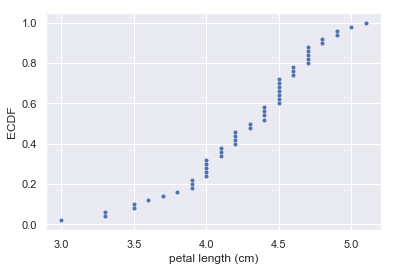

In [37]:
_= plt.plot(x,y, marker='.', linestyle='none')
_= plt.xlabel('petal length (cm)')
_= plt.ylabel('ECDF')
plt.show()

In [43]:
#Now it is time to draw ecdf for all three [setosa, versicolor, virginica] species petal length
x_set, y_set= ecdf(iris[iris.species=='setosa']['petal_length'])
x_ver, y_ver= ecdf(iris[iris.species=='versicolor']['petal_length'])
x_vir, y_vir= ecdf(iris[iris.species=='virginica']['petal_length'])

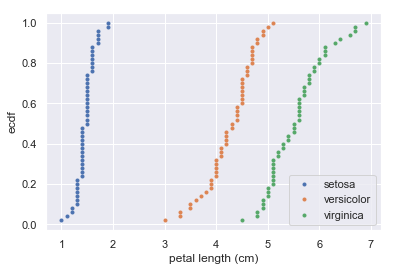

In [44]:
_= plt.plot(x_set, y_set, marker='.', linestyle='none')
_= plt.plot(x_ver, y_ver, marker='.', linestyle='none')
_= plt.plot(x_vir, y_vir, marker='.', linestyle='none')
_= plt.xlabel('petal length (cm)')
_= plt.ylabel('ecdf')
_= plt.legend(['setosa','versicolor','virginica'], loc='lower right')
plt.show()

In [42]:
x_vir

array([], dtype=float64)